<img src="https://images.ctfassets.net/4cd45et68cgf/637ArQo6YNsJf48Xw3zUAg/d030f9065a0fe54de777eaa600cf3fcb/N-Games_March_936x622.png?w=750">

# Introduction

Analyzing a Netflix dataset for exploratory data analysis (EDA) and predictive modeling for past and future business growth. In this project I have used data cleaning, statistics, data preparation, data visualization, automatic EDA for profiling data, modeling data with logistic regression, random forest, decision tree and SVM algorithms.

# Import Packages

In [154]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ydata_profiling as pp
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [141]:
pip install numba --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/79/89/2d924ca60dbf949f18a6fec223a2445f5f428d9a5f97a6b29c2122319015/numba-0.60.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.44,>=0.43.0dev0 from https://files.pythonhosted.org/packages/20/ab/ed5ed3688c6ba4f0b8d789da19fd8e30a9cf7fc5852effe311bc5aefe73e/llvmlite-0.43.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.7 MB 2.4 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.7 MB 5.5 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.7 MB 7.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.7 MB 8.3 MB/s eta 0:00:01
   ----------------------------- ---------- 2.

   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 5.8 MB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.7.0 requires scipy<1.12,>=1.4.1, but you have scipy 1.13.1 which is incompatible.


In [130]:
data = pd.read_csv('netflix_titles.csv')

In [5]:
data.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [32]:
print(f'This dataset contains {data.shape[0]} rows and {data.shape[1]} columns now')


This dataset contains 8807 rows and 13 columns now


In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [143]:
ydata_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

While preprocessing and viewing the data in pandas profiling, we observe that director's cell is mising data around 30%

In [10]:
content_type_counts = data['type'].value_counts()
content_type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [12]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [14]:
data.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

# Data Visualization

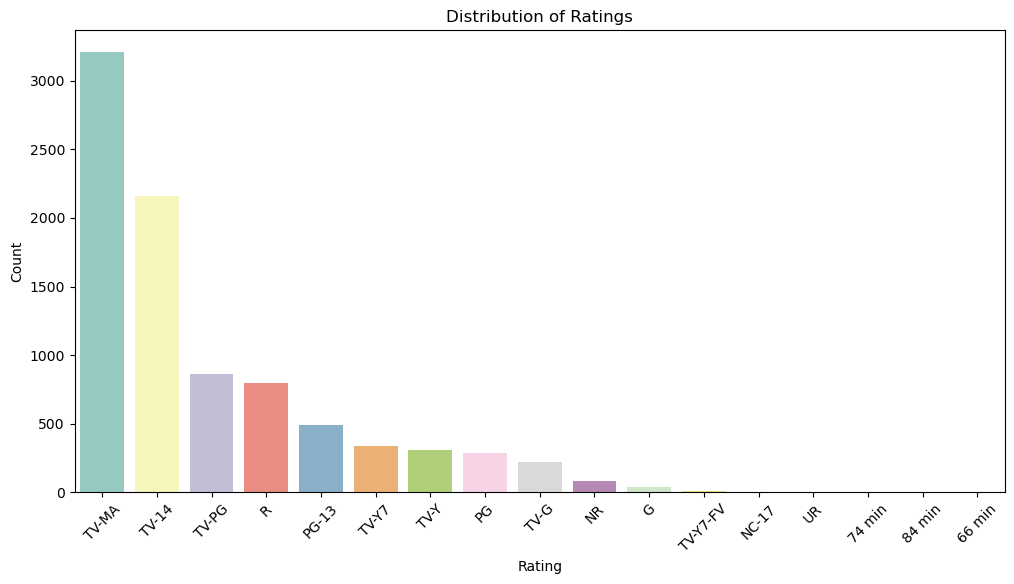

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index, palette='Set3')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

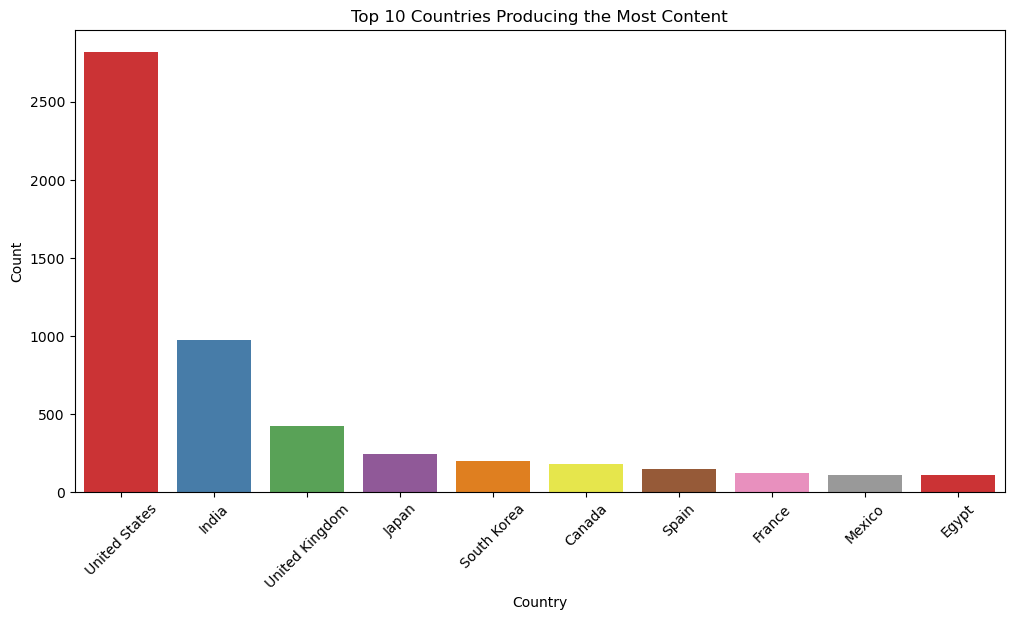

In [20]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')
plt.title('Top 10 Countries Producing the Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

India ranks in second position in contributing contents to Netflix, but variation between the first place US.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


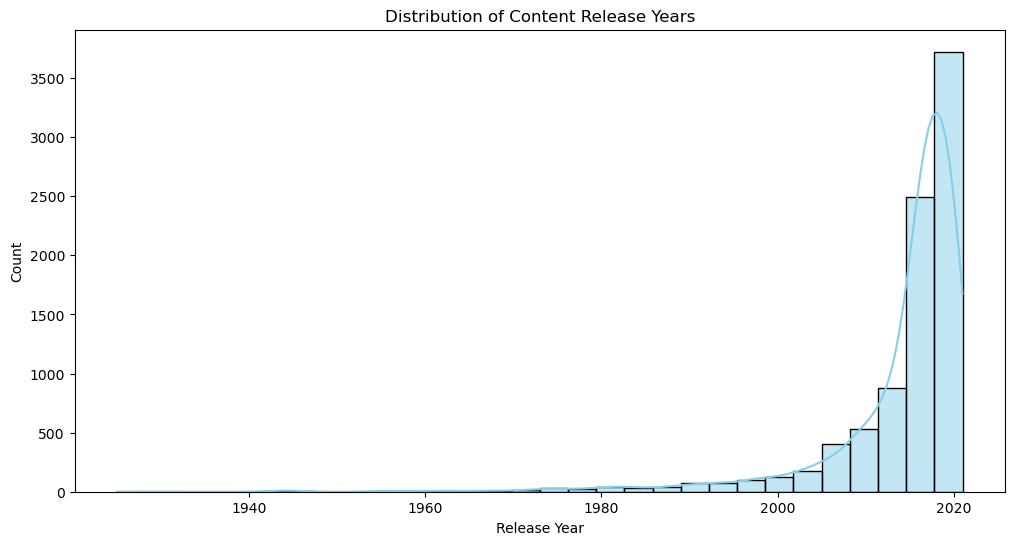

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


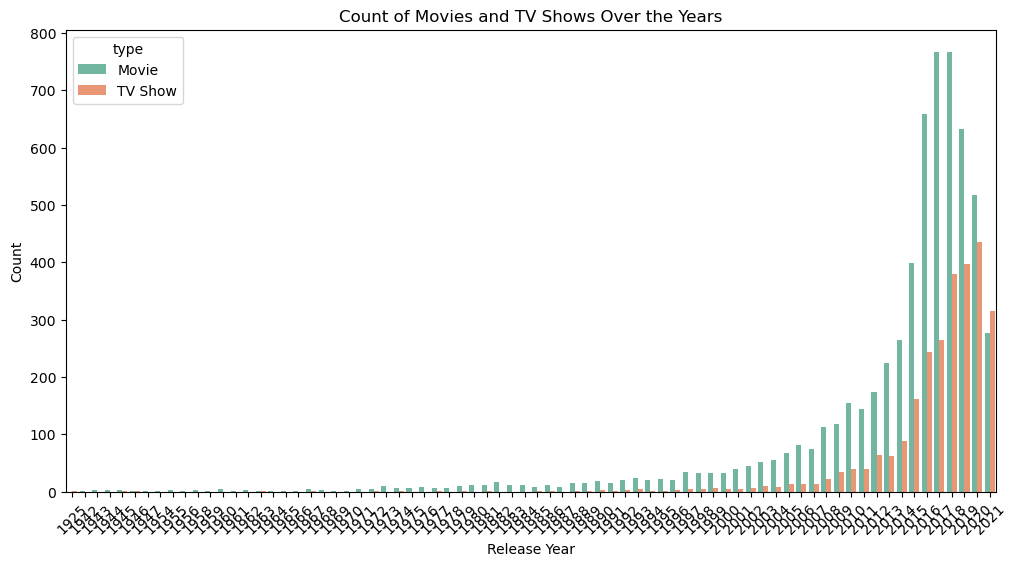

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='release_year', hue='type', palette='Set2', order=sorted(data['release_year'].unique()))
plt.title('Count of Movies and TV Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

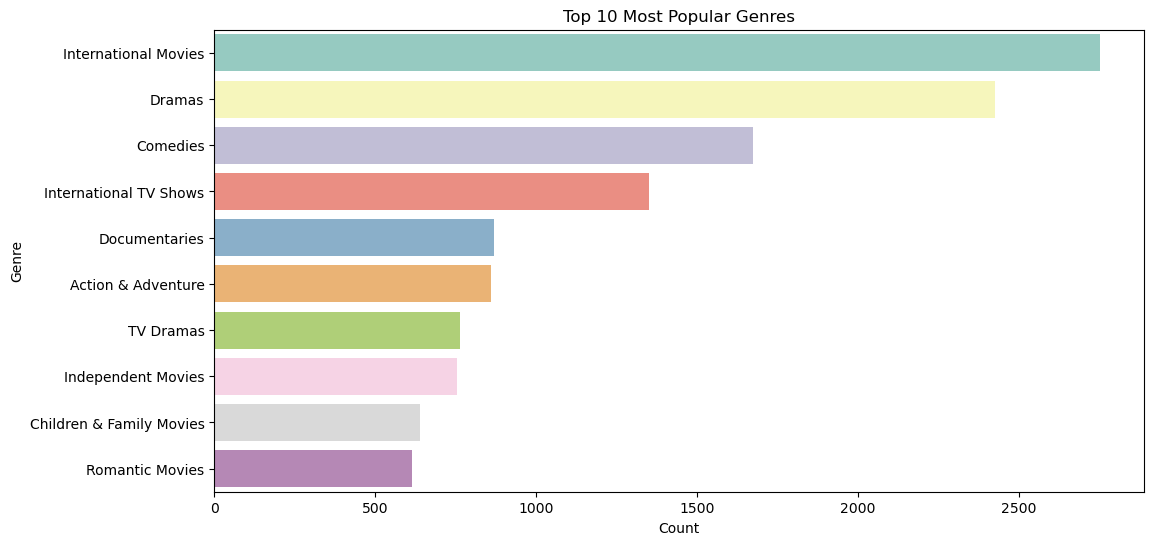

In [26]:
plt.figure(figsize=(12, 6))
data['listed_in'] = data['listed_in'].str.split(', ')
genres = data['listed_in'].explode().value_counts().head(10)
sns.barplot(x=genres.values, y=genres.index, palette='Set3')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

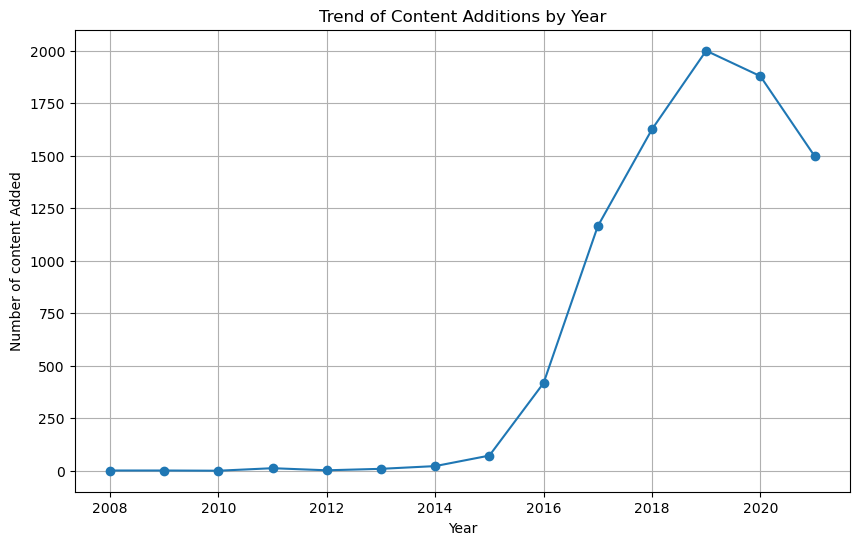

In [29]:
data['year_added'] = data['date_added'].dt.year
yearly_counts = data['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Trend of Content Additions by Year')
plt.xlabel('Year')
plt.ylabel('Number of content Added')
plt.grid(True)
plt.show()

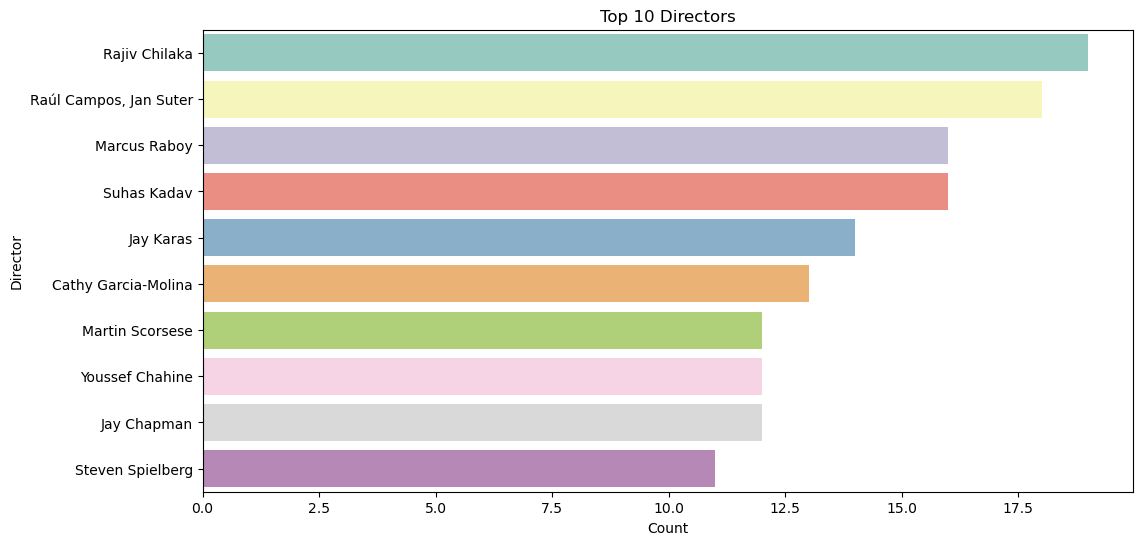

In [28]:
top_directors = data['director'].dropna().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set3')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


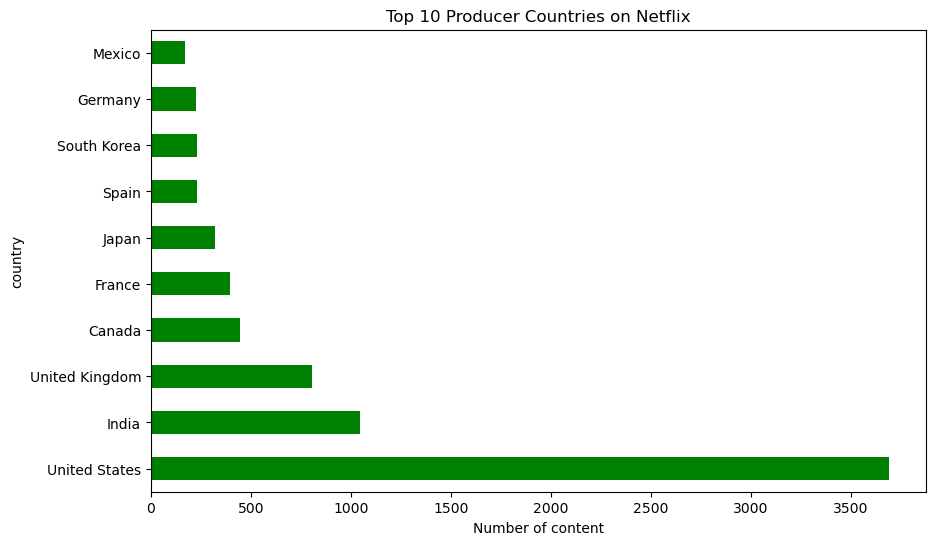

In [30]:
country_counts = data['country'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color='green')
plt.title('Top 10 Producer Countries on Netflix')
plt.xlabel('Number of content')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Egypt')])

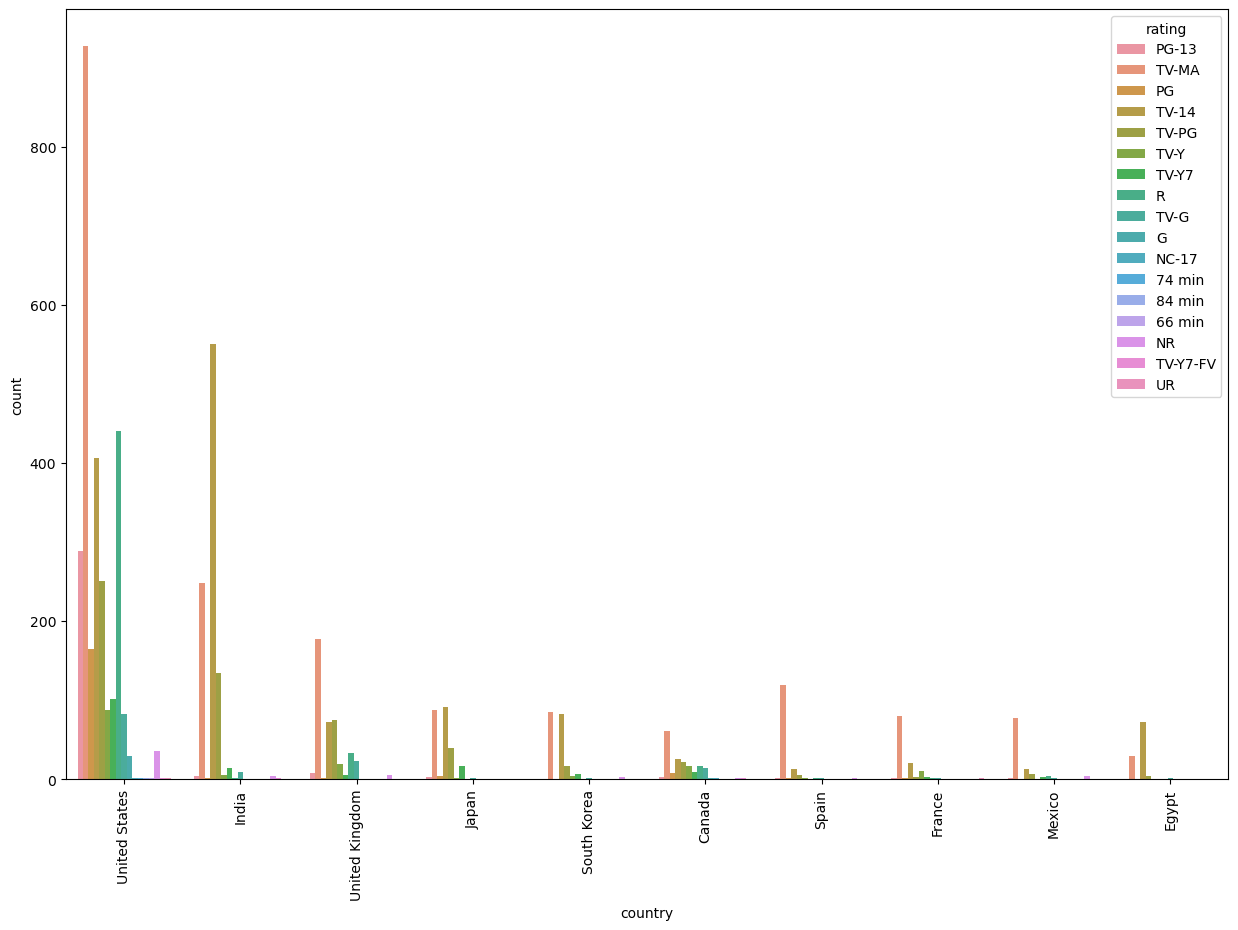

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(x = data['country'], order = top_countries.index, hue =data['rating'] )
plt.xticks(rotation=90)

In [43]:
fig = px.histogram(data, x="rating", color="rating")
fig.update_layout(
    bargap=0.2
)
fig.show()
ratings = data.groupby(['rating']).size().reset_index(name='counts')
ratings

fig = px.pie(ratings, names = 'rating',values = 'counts',
             title = 'Distribution of ratings on Netflix',height =  600 , width = 600)
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


# Training and Modelling

In [44]:
columns = data.select_dtypes(include=('object')).columns
columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'description'],
      dtype='object')

# Label Encoder

In [45]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()
for col in columns:
    data[col] = le.fit_transform(data[col].astype('int'))


In [105]:
data.dtypes

show_id                  int64
type                     int64
title                    int64
director                 int64
cast                     int64
country                  int64
date_added      datetime64[ns]
release_year             int64
rating                   int64
duration                 int64
year_added               int32
dtype: object

In [107]:
data=data.drop('date_added', axis=1)

In [ ]:
data=data.drop('listed_in', axis=1)

In [92]:
x

show_id  title  director  cast  country date_added  release_year  \
0           0     97       493  7136      514 2021-09-25          2020   
1         302     47      3234  2708      295 2021-09-24          2021   
2         404    932       260  5430      692 2021-09-24          2021   
3        1774   1987      3234  7136      692 2021-09-24          2021   
4        3145   2426      3234  3604       80 2021-09-24          2021   
...       ...    ...       ...   ...      ...        ...           ...   
8802     8363   8485      3898  3432      514 2019-11-20          2007   
8803     8364   8488      3234  7136      692 2019-07-01          2018   
8804     8365   8489      2142  1649      514 2019-11-01          2009   
8805     8366   8493      1667  6376      514 2020-01-11          2006   
8806     8367   8498      1272  6665       80 2019-03-02          2015   

      rating  duration  year_added  
0          7        30        2021  
1         11        46        2021  
2         11         0        2021  
3         11         0        2021  
4         11        46        2021  
...      ...       ...         ...  
8802       8       100        2019  
8803      14        46        2019  
8804       8        25        2019  
8805       6        25        2020  
8806       9       186        2019  

[8807 rows x 10 columns]

In [108]:
x = data.drop(['type'], axis='columns')
y = data[['type']]

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


# StandardScaler

In [111]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# Logistic Regression

In [156]:
lr_c=LogisticRegression(random_state=0)
lr_c.fit(x_train,y_train)
lr_pred=lr_c.predict(x_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.8076049943246311


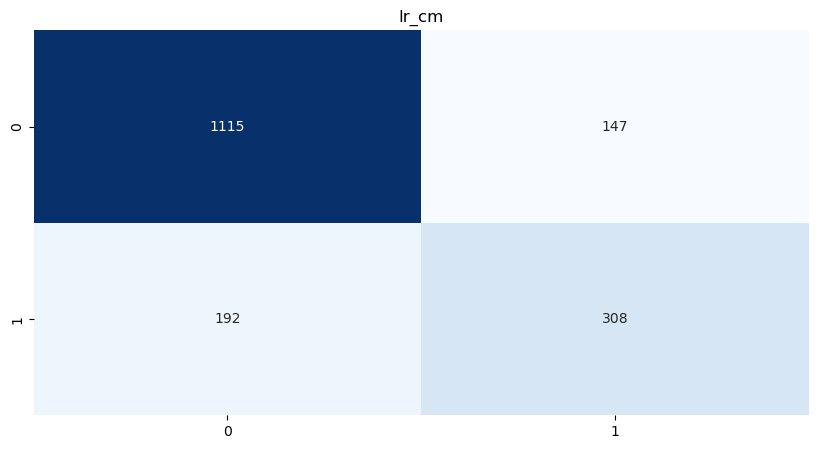

In [157]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

# Decision Tree Model

In [121]:
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(x_train,y_train)
dtree_pred=dtree_c.predict(x_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_cm
dtree_ac=accuracy_score(dtree_pred,y_test)
dtree_ac

0.9835414301929626

DecisionTree_Classifier_accuracy: 0.9835414301929626


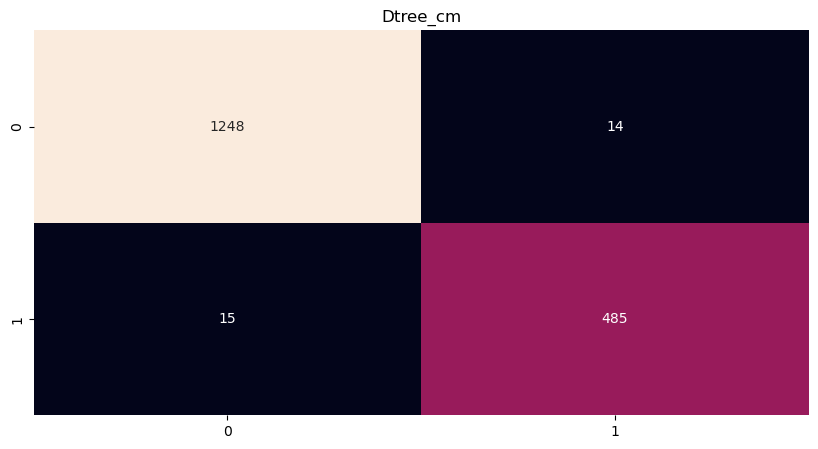

In [122]:
plt.figure(figsize=(10,5))
plt.title("Dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

# SVM regressor

In [123]:
svc_r=SVC(kernel='rbf')
svc_r.fit(x_train,y_train)
svr_pred=svc_r.predict(x_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

SVM_regressor_accuracy: 0.8927355278093076


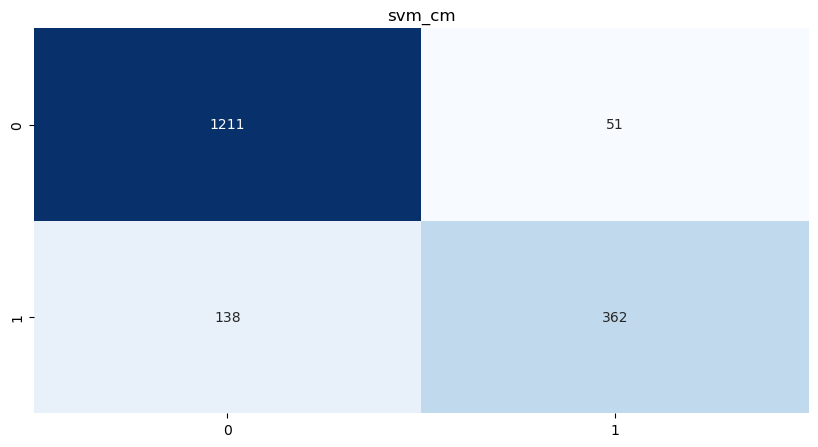

In [127]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

# RandomForest 

In [131]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(x_train,y_train)
rdf_pred=rdf_c.predict(x_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

RandomForest_accuracy: 0.9829738933030647


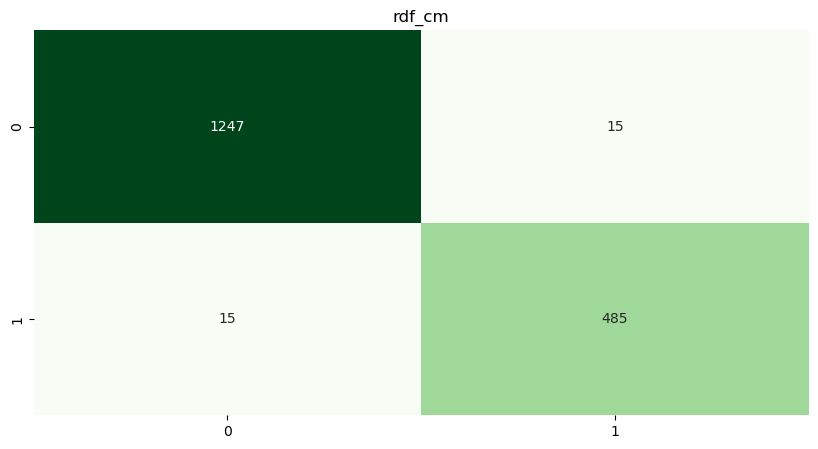

In [132]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Greens",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

Text(0.5, 1.0, 'Model Accuracy')

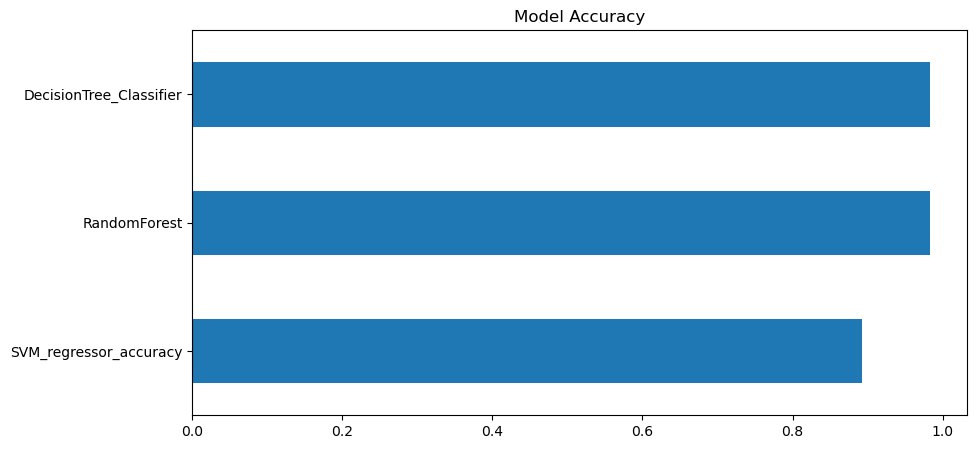

In [137]:
model_accuracy = pd.Series(data=[dtree_ac,svr_ac,rdf_ac], index=['DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

# Conclusion

The contents that enjoyed more are International films, dramas and comedies. 
United states is the leading country to produce more number of contents.
TV shows are have distributed widely across countries. This observation highlights the concentration of the film and television industry in certain countries, which dominate the market in terms of diversity of directors.
Directors from US and UK produce a lot towards the content.


 Rating By analyzing - As per the rating, it is found that TV-MA distribution along with the duration of films.
 Distribution of Film Lengths- The distribution of movie lengths and observed that the majority of movies are between 66 and 100 minutes long. This information can be useful for producers and directors to align their productions with market expectations.
 
Impact of Covid- It is observed that during 2020, there is fall in contents across the globe.